

# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Given that major films costing over 100 million USD to produce can still flop, this question is more important than ever to the industry. Can we predict which films will be highly rated, whether or not they are a commercial success? [source](https://www.kaggle.com/tmdb/tmdb-movie-metadata)
 


### Question(s) for Analysis: 
>What are the top 15 rated movies?

>how the votes have evolved over the years?

>How has the revenue of the movies changed over the years?

>Does the vote affects the movie's revenue?

>Does the Runtime affects the movie's revenue?

>What are the most dominant genres?

In [163]:
# importing the necessary packages:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [29]:
# I had to install tensorflow first for some reason
!pip install tensorflow
# Upgrade pandas to use dataframe.explode() function.
!pip install --upgrade pandas==0.25.0
# to use wordcloud to visualize text data
!pip install wordcloud matplotlib
# upgrade seaborn to latest version
!pip install seaborn --upgrade

    99% |███████████████████████████████▉| 1.6MB 23.6MB/s eta 0:00:01    38% |████████████▎                   | 624kB 22.2MB/s eta 0:00:01    100% |████████████████████████████████| 1.6MB 11.1MB/s 
    100% |████████████████████████████████| 10.5MB 1.8MB/s eta 0:00:01   35% |███████████▌                    | 3.7MB 18.7MB/s eta 0:00:01    44% |██████████████▎                 | 4.7MB 18.0MB/s eta 0:00:01    61% |███████████████████▊            | 6.5MB 17.0MB/s eta 0:00:01    69% |██████████████████████▎         | 7.3MB 16.2MB/s eta 0:00:01    94% |██████████████████████████████▎ | 9.9MB 18.8MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.8MB/s eta 0:00:01  2% |█                               | 389kB 21.0MB/s eta 0:00:01    10% |███▌                            | 1.4MB 20.6MB/s eta 0:00:01    18% |██████                          | 2.5MB 20.7MB/s eta 0:00:01    27% |████████▊                       | 3.7MB 24.2MB/s eta 0:00:01    43% |██████████████                  | 5

<a id='wrangling'></a>
## Data Wrangling

>This section is divided into two main categories, General Properties, and Data Cleaning, below each category, I will provide some breef introdutory of what is it all about. 


### Data Assessing
>In this section of the report, we will start off by loading the dataset into a dataframe and then preform some statements to familiarize ourselves with the dataset in question.

In [164]:
#loding the csv file into a dataframe 'df'
df = pd.read_csv('tmdb-movies.csv')

#these two lines here is to be able to see the whole dataset without row-limitation:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Loading the first 20 rows to see how the dataset looks like.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [165]:
#We want to learn more about the dataset for example, how many (rows, columns)
df.shape

(10866, 21)

In [166]:
#Getting more information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> here we can see a breef overview of the datatypes of different columns, and we can also see that there are some missing values in some columns. we'll deal with them in the cleaning section of the report.

In [167]:
#from the .describe() method we can get a first impression about max and mean of budgets, runtime, etc.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>Here we can see that most of the numbers are hard to read in the eyes of the ordinary person, for example: the mean revenue, maybe we could update this in the cleaning section of the report.

>We can also spot that 50% of the film releases were between 1995 and 2011, and also during those years, the voting count has grown drastically, while the runtime remained relatively close.

>Also the revenue and budget columns both have lots of 0 values.. more on that later.

>The popularity columns seems vague and the numbers doesn't help to understand it.

In [168]:
# Let's check for duplicated data
sum(df.duplicated())

1

>It seems that there is only one row that is duplicated, we will drop that row in the cleaning section of the report.

In [169]:
# Let's check iif the same director has produced the same movie more than once
# i.e duplicate rows that maybe has wrong entries in other columns, which did not qualify for the 
#df.duplicated() statement above
df.duplicated(['original_title', 'director']).sum()

6

> Hmmm, interesting.. now it says 6 columns, so 5 more than the previous one. 

> But there is another argument, that these movies could be another iteration in a different year, Let's check for that.

In [170]:
#because we know that every movie has a unique ID, so we will include this in our search to see
#if there are really duplicate movies
df.duplicated(['original_title', 'director', 'id']).sum()

1

> So the answer is no, there isn't any duplicate movies, It may be just another series or franchise of this movie with the same director. 

In [171]:
# Check for rows containing either 25% or more than 25% NaN Values
percentage = 25.0 
min_count =  int(((100 - percentage) / 100) * df.shape[1] + 1)
#dropping whatever rows that contain 25% or more NaN values
modified_df = df.dropna(axis = 1, thresh = min_count)
#checking if the two dataframes equal each other
modified_df.equals(df)

True

> We can see that there is no row that has 25% or more NaN values

In [172]:
# Check for columns containing either 25% or more than 50% NaN Values
percentage = 25.0 
min_count =  int(((100 - percentage) / 100) * df.shape[1] + 1)
#dropping whatever columns that contain 25% or more NaN values
modified_df = df.dropna(axis = 0, thresh = min_count)
#checking if the two dataframes equal each other
modified_df.equals(df)

False

> Now we can see that there were indeed some columns that had 25% or more NaN values, so we will drop them.
>- Namely those were, the 'homepage', 'tagline' columns

In [173]:
#Let's check for movies that was released in the same year that I was born.
sum(df['release_year'] == 1997)

192

>So 192 movies were released in the year 1997.

In [174]:
#Let's see how many unique Genres of movies in this dataset.
df.genres.nunique()

2039

> So almost 20% Genres are unique and the rest 75% are repeated.



### Data Cleaning
> In this section of Data Wrangling, we will check for cleanliness, and then trim and clean our dataset for analysis.

In [175]:
# Let's check for any NaN values.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>Back to the NaN values again, we will now preform some statement to learn a bit more about those NaN values.

In [176]:
#with the previous steps in mind. Now, 
#let's drop those NaN colmns that wouldn't neccessirly benefit our analysis.
df.drop(['homepage', 'tagline'], axis=1, inplace=True)
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [177]:
# Then let's get rid of that duplicated row mentioned above
df.drop_duplicates(inplace=True)
sum(df.duplicated())


0

> Bingo! Now the dataset doesn't have any duplicated rows.

In [178]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


>Taking a closer look at the dataset, we could see that the columns: 'cast', 'keywords', 'genres', and finally 'production_companies' all have a pipline '|' as seperator, which doesn't look quite aethetic, and most importantly wouldn't benefit us in the visualization, so it should be tackled.

In [179]:
df['cast'] = ', '.join(df['cast'].str.cat(sep='|').split('|'))

In [180]:
df['keywords'] = ', '.join(df['keywords'].str.cat(sep='|').split('|'))

In [181]:
df['genres'] = ', '.join(df['genres'].str.cat(sep='|').split('|'))

In [182]:
df['production_companies'] = ', '.join(df['production_companies'].str.cat(sep='|').split('|'))

In [183]:
# I've noticed that the director column also contained a '|' in some rows...
df['director'] = ', '.join(df['director'].str.cat(sep='|').split('|'))

> It seemed faster for the kernel to incoperate them in different cells

## Summary
##### Data Assessing: 
>After loading the CSV file, I have preformed some statement to learn and familiarize myself about the dataset and see what can be improved or cleaned, and what analysis I can preform with the given data.

##### Data Cleaning: 
>I tried to stay discrete and removed only rows or columns that had more than 25% NaN values. However, the dataset was pretty clean to begin with, It was just two columns that had too much NaN values and had to be dropped. After some research I learned that It is not always the best to drop the whole column, and I should always see what is best suited for my analysis, and I did so.

<a id='eda'></a>
## Exploratory Data Analysis



After cleaning and assessing the dataset, now It's time to explore it.


### Research Question 1:

### What are the top 15 rated movies?

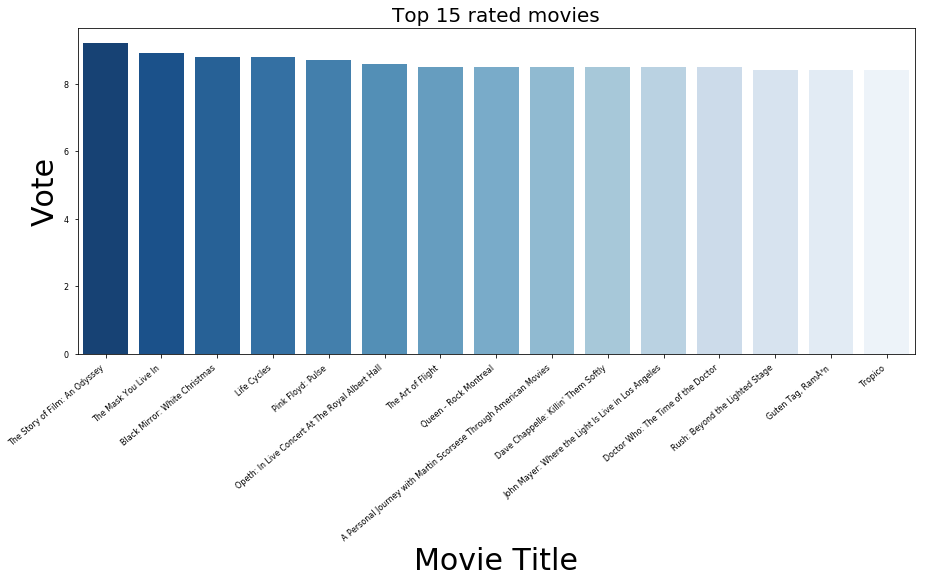

In [184]:
plt.figure(figsize=[15, 6])
#in order to group the two columns the plot the very top rated 10 movies,
#I used the sort_values() method to set the arrangement of the voting to descending
vote_title_columns = df[['original_title','vote_average']].sort_values('vote_average', ascending = False).head(15)
ax = sns.countplot(x="original_title",  data=vote_title_columns) #because x axis text is too big
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #so we rotate the text so it don't overlap
sns.barplot(x = 'original_title', y = 'vote_average', data = vote_title_columns, palette = 'Blues_r')
#now I'll make the font for the axis a little bigger because otherwise It would be too small.
plt.title('Top 15 rated movies', fontsize = 20)
plt.xlabel('Movie Title', fontsize = 30)
plt.ylabel('Vote', fontsize = 30);
plt.show()

>It seems that 'The Story of Film: An Odyssey' is the top rated movie out there, but let's fact check this data below

In [186]:
df[['original_title','vote_average', 'release_year']].sort_values('vote_average', ascending = False).head(15)

,original_title,vote_average,release_year
3894,The Story of Film: An Odyssey,9.2,2011
538,The Mask You Live In,8.9,2015
1200,Black Mirror: White Christmas,8.8,2014
2269,Life Cycles,8.8,2010
6911,Pink Floyd: Pulse,8.7,2006
2401,Opeth: In Live Concert At The Royal Albert Hall,8.6,2010
3690,The Art of Flight,8.5,2011
8411,Queen - Rock Montreal,8.5,1981
8221,A Personal Journey with Martin Scorsese Throug...,8.5,1995
8839,Dave Chappelle: Killin' Them Softly,8.5,2000


>But Interestingly if you took a closer look, you would find that most high voted movies are quite recent, I'm guessing because now the Internet makes every thing much easier...
So what about the old movies do they get fewer votes? or bad votes in general?
### Research Question 2:

### Let's see how the votes have evolved over the years

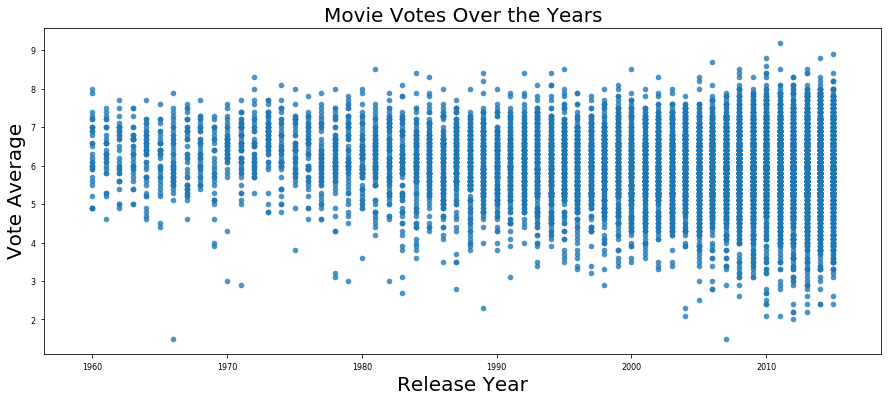

In [187]:
plt.figure(figsize=(15, 6))
sns.set_context("paper")
ax = sns.regplot(x=df["release_year"], y=df["vote_average"], fit_reg=False)
ax.set_xlabel('Release Year', fontsize = 20)
ax.set_ylabel('Vote Average', fontsize = 20)
plt.title('Movie Votes Over the Years', fontsize = 20)
plt.show()

>From the plot's positive correlation above we can see that indeed the recent the movie is, the more votes it gets. However, that doesn't mean that the earlier movies got voted worse. Most of the votes, in fact, were above 5

In [188]:
top_rated_movie = df['vote_average'].max()
df['original_title'][df['vote_average']==top_rated_movie]

3894    The Story of Film: An Odyssey
Name: original_title, dtype: object

>Indeed 'The Story of Film: An Odyssey' has recived the most votes out of 10, which corresponds to the first plot

> But what about the worst voted movie?

In [189]:
worse_rated_movie = df['vote_average'].min()
df['original_title'][df['vote_average']==worse_rated_movie]

7772                Transmorphers
10865    Manos: The Hands of Fate
Name: original_title, dtype: object

> So the worst rated two movies were: 'Transmorphers' and 'Manos: The Hands of Fate'

> But this data raises yet another question. Is having Lesser votes for earlier movies means that they are less profitable?

>so the next question is:


### Research Question 3:

### How has the revenue of the movies changed over the years?

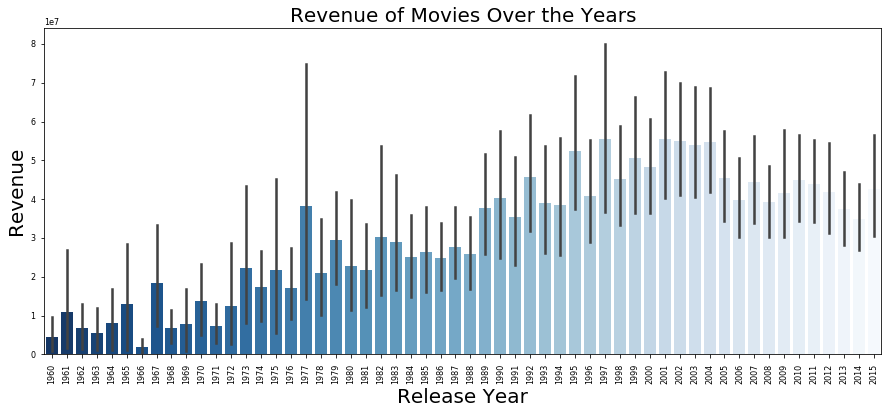

In [190]:
plt.figure(figsize=(15, 6))
columns_data = df[['release_year','revenue']]
#using seaborn as it makes the plots much more prettier imo.
sns.barplot(x='release_year', y='revenue', data=columns_data, palette='Blues_r')
plt.title('Revenue of Movies Over the Years', fontsize = 20)
plt.xlabel('Release Year', fontsize = 20)
plt.ylabel('Revenue', fontsize = 20) 
plt.xticks(rotation = 90) # to make the text under x-axis rotated by 90 degrees so it doesn't overlap
plt.show()

>Looking at the plot above, now It seems only fair to check which year and what movie had the highest revenue 

In [191]:
df[['original_title','revenue', 'release_year']].sort_values('revenue', ascending = False).head(5)

,original_title,revenue,release_year
1386,Avatar,2781505847,2009
3,Star Wars: The Force Awakens,2068178225,2015
5231,Titanic,1845034188,1997
4361,The Avengers,1519557910,2012
0,Jurassic World,1513528810,2015


>What about the least profitable movies?

In [192]:
df[['original_title','revenue', 'release_year']].sort_values('revenue', ascending = True).head(5)

,original_title,revenue,release_year
10865,Manos: The Hands of Fate,0,1966
5190,Helen of Troy,0,2003
5189,Nothing,0,2003
5188,Love Object,0,2003
5187,Northfork,0,2003


In [200]:
df.revenue.eq(0).sum()

6016

>Well we now see the problem mentioned earlier that more than 50% of the revenue column is 0


In [201]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>We can see that quite clearly in the revenue and budget columns.

>But Let's continue and look for what also could be a factor in high revenue

### Research Question 4:

### Does the vote affects the movie's revenue?

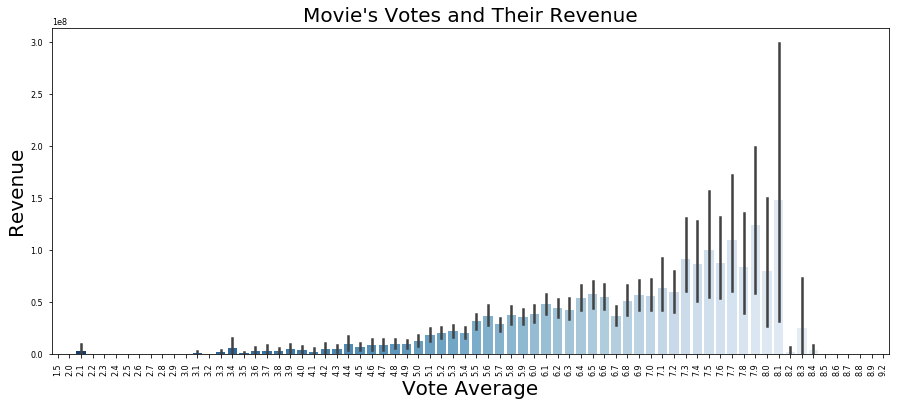

In [219]:
plt.figure(figsize=(15, 6))
columns_data = df[['vote_average','revenue']]
#using seaborn as it makes the plots much more prettier imo.
sns.barplot(x='vote_average', y='revenue', data=columns_data, palette='Blues_r')
plt.title('Movie\'s Votes and Their Revenue', fontsize = 20)
plt.xlabel('Vote Average', fontsize = 20)
plt.ylabel('Revenue', fontsize = 20) 
plt.xticks(rotation = 90) # to make the text under x-axis rotated by 90 degrees so it doesn't overlap
plt.show()

> Although, The revenue column is quite corrupted but we could see the pattern here that, the newer the movie is, the higher votes it gets, the more revenue it makes.

### Research Question 5:

### Does the Runtime affects the movie's revenue?

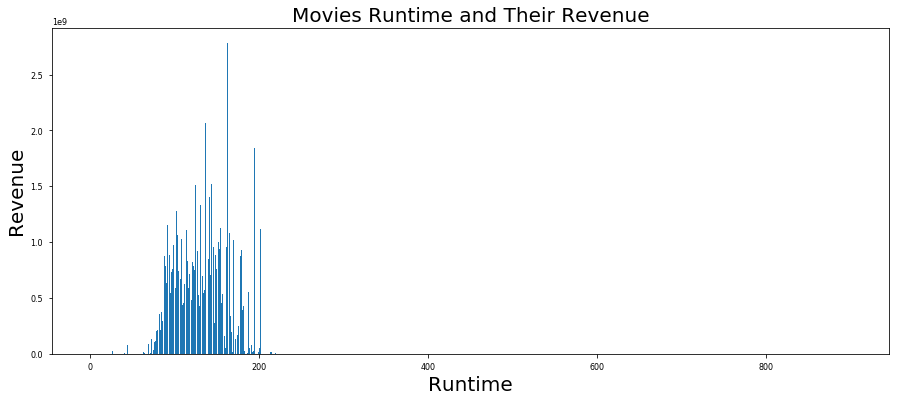

In [250]:
plt.figure(figsize=(15, 6))
sns.set_context("paper")
plt.bar(df["runtime"], df["revenue"])
plt.xlabel('Runtime', fontsize = 20)
plt.ylabel('Revenue', fontsize = 20)
plt.title('Movies Runtime and Their Revenue', fontsize = 20)
plt.show()

In [263]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>from the dataset describe and the plot we can confirm that the highest revenue wasn't necessarily the longest in Runtime, and the mean Runtime seems to have the most revenue, However, we still keep in mind that more than 50% of the revenue column is 0

### Research Question 6:

### What are the most dominant genres?

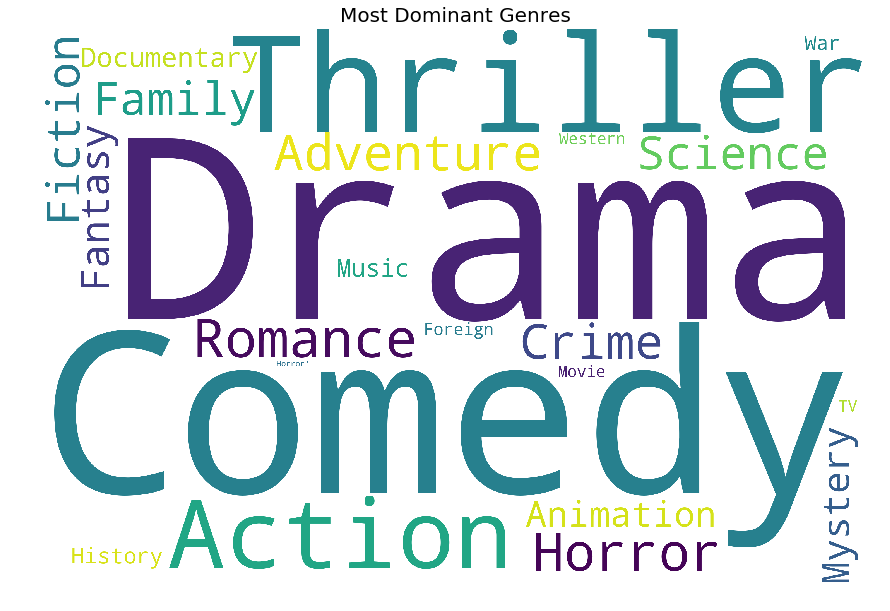

In [151]:
text = df.genres.values # input for the worldcloud generator
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='White', collocations=False, stopwords = STOPWORDS).generate(str(text))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.title('Most Dominant Genres', fontsize=20)
# don't plot any axis 
plt.axis("off")
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.


>The more recent the movie is, the higher chance it can be to get more votes, more revenue.

> Having lesser votes, doesn't necessarily mean a bad movie, because most of those votes appear to be moer than 5/10

>Avatar movie has the highest revenue, while 'The Story of Film: An Odyssey' has the highest average rating

> The longer the film, doesn't necessarily means higher revenue, and vice versa.

## Limitaions:

> the 'production_company', 'genres', 'cast' columns were formulated in a way it was too cumbersome extract data from.

>the 'revenue', and 'budget' column had more than 50% 0 values. 

>Popularity column is vague and doesn't represent any information about itself.

## Additional Research:

>Columns mentioned above needs to be updated, fixed, and explained thouroghly.

>Developing a new way to calculate the revenue_adj as of today's money.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [264]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0